In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/etsydataset/data/.gitkeep
/kaggle/input/etsydataset/data/parquet/test/part-00170-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00049-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00065-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00132-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00146-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00092-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00000-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00184-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00157-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00108-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00274-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00151-of-00278.parquet
/kaggle/input/etsydataset/data/parquet/test/part-00191-of-00278.parquet
/kaggle/input/etsydatase

# Loading Dataset

In [31]:
# libraries
import io
import os
import copy
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
import tensorflow as tf

In [32]:
PATH = f"/kaggle/input/etsydataset/data"

In [33]:
## For parquet files
parquet_filenames_train = !ls -l {PATH}/parquet/train
parquet_filenames_test = !ls -l {PATH}/parquet/test
## For tfrecord files
tfrecord_filenames_train = !ls -l {PATH}/tfrecords/train
tfrecord_filenames_test = !ls -l {PATH}/tfrecords/test

In [34]:
##Function to read parquet files
def get_parquet_data(folder, N):
    """ Read parquet data from mutiple files """

    filenames = [ 
        f"{PATH}/parquet/{folder}/part-{i:05d}-of-{N:05d}.parquet" 
        for i in range(N)
    ]

    dataframes = [ 
        pd.read_parquet(filename) 
        for filename in filenames
    ]
    
    return pd.concat(dataframes)

In [35]:
## reading parquet files of train folder
df_train = get_parquet_data("train", len(parquet_filenames_train)-1)

In [36]:
## reading parquet files of test folder
df_test = get_parquet_data("test", len(parquet_filenames_test)-1)

In [37]:
#taking a copy of df_train dataframes in train_backup dataframe
train_backup=copy.deepcopy(df_train)
test_backup=copy.deepcopy(df_test)


## Exploratory Data Analysis

In [38]:
## Checking the number of records in train
f"Number of rows in train: {len(df_train):,}"

'Number of rows in train: 245,485'

In [39]:
## Checking number of unique products
f"Number of unique products in train: {len(df_train['product_id'].unique()):,}"

'Number of unique products in train: 245,485'

In [40]:
f"Number of columns in train: {len(df_train.columns):,}"

'Number of columns in train: 21'

In [41]:
## Checking unique values in type column
df_train['type'].unique()

array(['physical', None, 'download'], dtype=object)

In [42]:
df_train['type'].value_counts(dropna=False)

physical    236137
download      8074
NaN           1274
Name: type, dtype: int64

In [43]:
## checking unique values in color_text
COLORS = df_train['color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of colors in train: {NUM_COLORS:,}"

'Number of colors in train: 20'

In [44]:
df_train['color_id'].value_counts().sort_index()

0     12664
1     32537
2     26972
3      2922
4     22891
5      6337
6      2237
7     10728
8         1
9     15675
10     5346
11    15499
12     6639
13     5226
14    15243
15     1156
16    14892
17    31194
18     7406
19     9920
Name: color_id, dtype: int64

In [45]:
# Get the count of each unique value in 'color_text' column
color_counts = df_train['color_text'].value_counts()

# Print the count of each color
print(color_counts.sort_index())


beige        12664
black        32537
blue         26972
bronze        2922
brown        22891
clear         6337
copper        2237
gold         10728
green        15675
grey             1
orange        5346
other         9920
pink         15499
purple        6639
rainbow       5226
red          15243
rose gold     1156
silver       14892
white        31194
yellow        7406
Name: color_text, dtype: int64


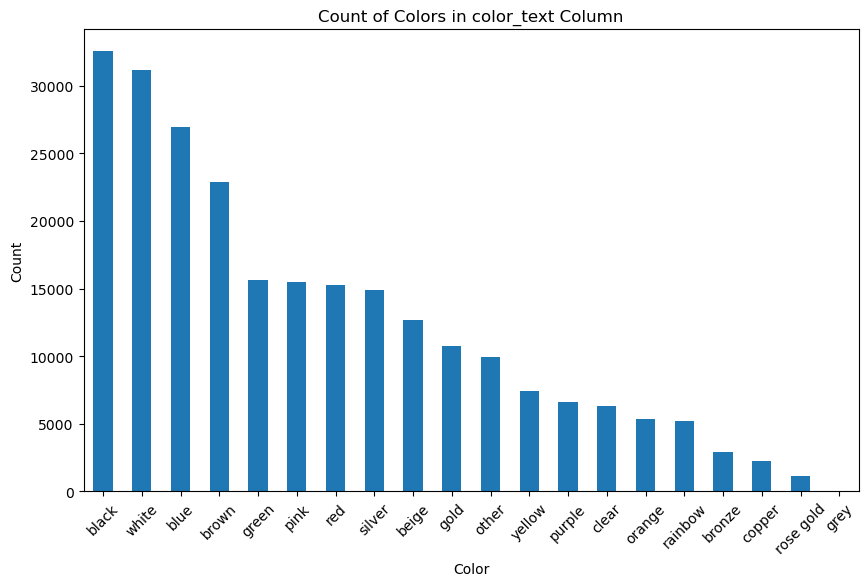

In [46]:
# Plot the count of each color as a bar chart
color_counts.plot(kind='bar', figsize=(10, 6), rot=45)

# Set the title and labels for the plot
plt.title('Count of Colors in color_text Column')
plt.xlabel('Color')
plt.ylabel('Count')

# Show the plot
plt.show()


In [47]:
f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [48]:
pd.value_counts(df_train['top_category_text'], sort=True, ascending=False)

home_and_living                53200
craft_supplies_and_tools       42348
clothing                       32028
toys_and_games                 14427
accessories                    12610
bath_and_beauty                12426
paper_and_party_supplies       10811
shoes                          10355
weddings                       10333
jewelry                         9457
art_and_collectibles            8741
electronics_and_accessories     8177
books_movies_and_music          7378
bags_and_purses                 6645
pet_supplies                    6549
Name: top_category_text, dtype: int64

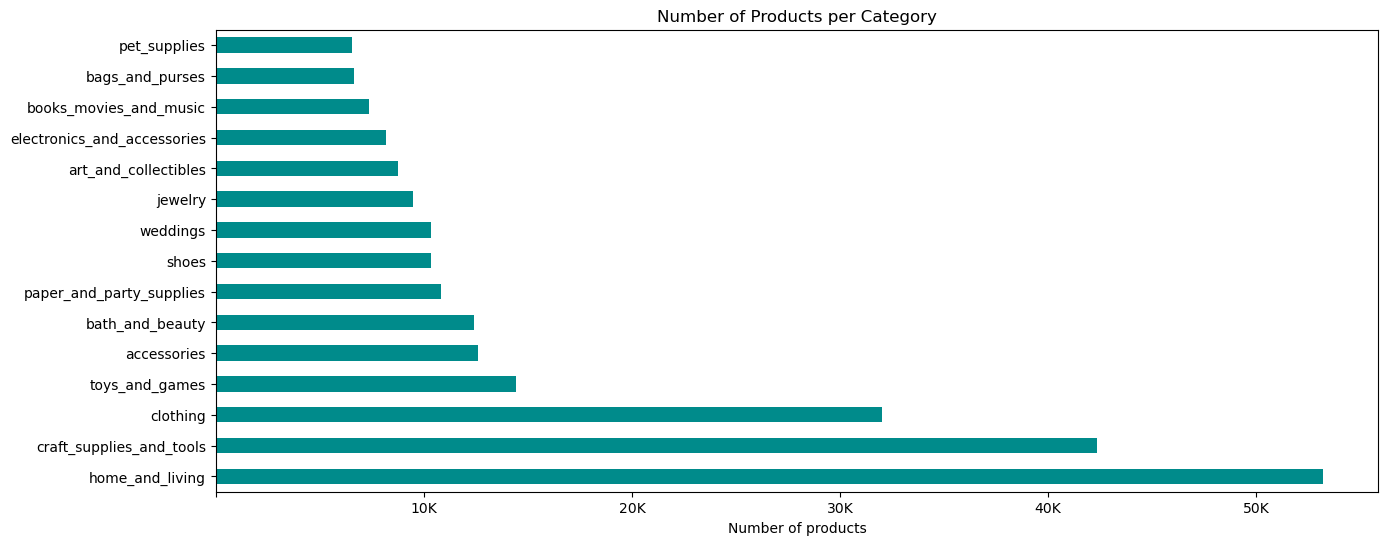

In [49]:
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'
    
figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    df_train[column], 
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

In [50]:
f"Number of bottom categories in train: {len(df_train['bottom_category_text'].unique()):,}"

'Number of bottom categories in train: 2,782'

In [51]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df_train):
        # Total missing values
        mis_val = df_train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df_train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [52]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 21 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
shape,243127,99.0
art_subject,242712,98.9
room,236758,96.4
pattern,234807,95.7
recipient,231732,94.4
style,228453,93.1
material,224609,91.5
craft_type,212965,86.8
holiday,204466,83.3
occasion,192256,78.3


Observations:
1. No missing data in target columns [top_category_id, top_category_text, bottom_category_id, bottom_category_text, color_id, color_text]
2. 14 columns have missing data. Checking for each column and imputing the data.
3. Possible reasons of missing data: 
     Each and every product may not have every attributes.
     Some products may not have enough data on the website.
     Some data was not captured during the data extraction stage.
4. Kind of missing data:
     Structural deficiencies\
     Random occurrences (MCAR, MAR)\
     Specific causes (NMAR)
5. Note: Limitations:
     All the imputation techniques to fill the missing values should be chosen considering the limitations of computation capacity.

In [53]:
#to check unique values in columns 
for index in list(df_train.select_dtypes(include='object').columns):
  print(f'{index} has {len(pd.unique(df_train[index]))} values')

title has 240370 values
description has 231775 values
tags has 196814 values
type has 3 values
room has 18 values
craft_type has 78 values
recipient has 24 values
material has 78 values
occasion has 75 values
holiday has 21 values
art_subject has 40 values
style has 94 values
shape has 48 values
pattern has 40 values
bottom_category_text has 2782 values
top_category_text has 15 values
color_text has 20 values


In [54]:
# display the selected rows with full column content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
#pd.reset_option('max_colwidth')
#pd.reset_option('max_rows')

In [55]:
df_train[df_train['description'].isna()]

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
133,625984631,None,None,None,physical,None,None,None,None,None,None,None,None,None,None,1406,pet_supplies.pet_health_and_wellness.pet_grooming.brushes_and_combs,11,pet_supplies,0,beige
239,724856919,None,None,None,physical,None,None,None,None,back to school,None,None,None,None,None,1348,paper_and_party_supplies.party_supplies.party_favors_and_games.favor_bags_and_containers,10,paper_and_party_supplies,11,pink
1087,529352006,None,None,None,physical,None,None,None,None,None,None,None,None,None,None,1051,home_and_living.kitchen_and_dining.dining_and_serving.serving_odds_and_ends,8,home_and_living,2,blue
1331,758426581,None,None,None,physical,None,None,None,None,None,None,None,None,None,None,6820,craft_supplies_and_tools.closures_and_fasteners.locks.purse_locks.thumb_locks,6,craft_supplies_and_tools,1,black
1335,894348531,None,None,None,physical,None,None,None,None,None,None,None,None,None,None,6820,craft_supplies_and_tools.closures_and_fasteners.locks.purse_locks.thumb_locks,6,craft_supplies_and_tools,16,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,700842943,None,None,None,physical,None,None,None,None,birthday,None,None,None,None,animal print,426,clothing.girls_clothing.skirts,5,clothing,11,pink
203,1395811705,None,None,None,physical,None,None,None,None,None,None,None,None,None,None,476,clothing.gender_neutral_adult_clothing.sweaters,5,clothing,14,red
354,614369628,None,None,None,physical,None,hat making & hair crafts,None,None,None,None,None,None,None,None,6762,craft_supplies_and_tools.blanks.hat_and_hair_blanks,6,craft_supplies_and_tools,16,silver
377,884722587,None,None,None,physical,None,hat making & hair crafts,None,None,None,None,None,None,None,None,6762,craft_supplies_and_tools.blanks.hat_and_hair_blanks,6,craft_supplies_and_tools,6,copper


After analysing the above 940 records in which title, description, tags and other attributes it was observed that these columns have missing values for those 940 records and this accounts for only 0.4% of overall records. So we can drop these records.

# Data Preprocesssing

In [56]:
## droping 940 missing records 
df_train.dropna(subset=['title', 'description'], inplace=True)

In [57]:
##checking the percentage of missing records
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.519332
room                    96.442373
craft_type              86.744771
recipient               94.387127
material                91.481322
occasion                78.354904
holiday                 83.291010
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

### Checking for "type" column

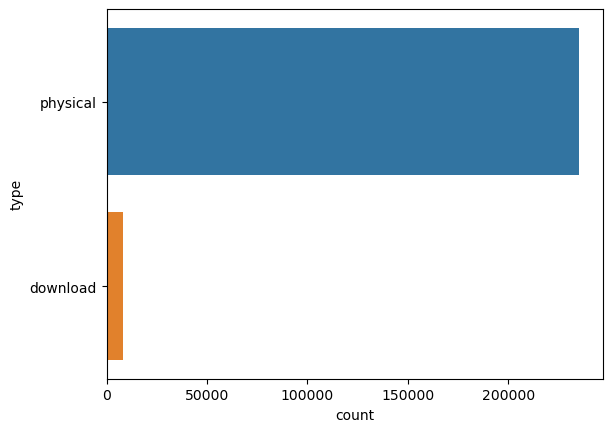

In [58]:
#checking type column 
pd.unique(df_train['type'])

sns.countplot(y=df_train['type'],data=df_train)
plt.show()

In [59]:
# Get the count of each unique value in 'type' column, including missing counts
type_counts = df_train['type'].value_counts(dropna=False)

# Print the count of each type, including missing counts
print(type_counts)


physical    235290
download      7985
NaN           1270
Name: type, dtype: int64


As there are 1270 missing values in the type column, we have to check whether they are missing randomly or missing for some specific products only.

In [60]:
df_train[df_train['type'].isna()]

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
166,1329282298,Colorado Country VTG Womens 8 Leather Lace 90s Hiking Boots Gorpcore Rare,Gently preowned \nVery good condition for vintage shoes \nSize is unknown - I am an average 7.5/8 and these fit comfortably with a medium width feel \nSmoke free and pet friendly home \nBundle and save \nFast Shipping \nShipped with care,"90s,Outdoor,Florsheim",None,None,None,None,None,None,None,None,None,None,None,1515,shoes.womens_shoes.boots.chukka_boots,12,shoes,19,other
190,957021639,Women&#39;s dark brown leather chukka boots handmade in Italy | L&#39;artigiano Florence,"Women&#39;s ankle boots handmade in Italy using a single layer of vegetable tanned greased dark brown cowhide leather in Italian tanneries without the use of chemicals such as chromium and nickel.\n\nOur unique manufacturing technique makes the shoe light yet durable. Hypoallergenic in contact with the skin, therefore also suitable for use without a sock in the milder seasons.\n\nIt is possible to make this model with a leather sole for those who prefer an elegant and classic shoe. For lovers of comfortable walking we suggest the para sole: a comfortable and resistant natural rubber perfect for winter.",None,None,None,None,None,None,None,None,None,None,None,None,1515,shoes.womens_shoes.boots.chukka_boots,12,shoes,4,brown
345,1259138725,True Religion Jeans Truey Trousers Denim Billy QT Stitch Womens Blue Waist 24,True Religion Jeans \n\nTruey Trousers Denim Billy QT Stitch Contrast Stitch Womens Blue Waist 24\n\nWaist:24\nInner Leg L:32\nRise:6\nSKU:Z2A05,"mens,womens,vintage,outfit,dreamvintage",None,None,None,None,None,None,None,None,None,None,None,508,clothing.womens_clothing.jeans,5,clothing,2,blue
381,1392198106,Karen Millen Bootcut Jeans | Size 8 | Womens Vintage Y2K,"Item- Karen Millen Bootcut Jeans | Size 8 | Womens Vintage Y2K\nCondition- In good used condition with one of the fly laces missing its beads at the end as shown in the pictures\nWe are a small family run business, doing our small bit for sustainable fashion.\nAll of our items are authentic vintage/second hand pieces (unless otherwise listed) so naturally minor signs of wear such as small stains, small pulls/pin holes and minor marks may occur. We aim to include these in photos and the listing.\nWe do our very best to find any major faults and also point them out in the photos or mention them in the listing so please look at them carefully.\nWe dispatch all our items using 100% recycled and recyclable materials.\nPlease feel free to ask questions.",None,None,None,None,None,None,None,None,None,None,None,None,508,clothing.womens_clothing.jeans,5,clothing,2,blue
394,1174492681,Vintage Georges Marciano Guess Black Faded Distressed USA Made Denim Jeans,"Material:100% cotton\nzipper fly\nmade in USA\n\nfaded\nsee pictures for condition\n\nsize on tag:34\nfits like a:men&#39;s:medium, women&#39;s: XL 16\nwaist:16.5\nhips:21\nrise:11.5\ninseam:29\nleg opening:7.5\nout seam:40\nthigh(1&quot; down from the crotch seam)12.5\nknee(14&quot; down from the crotch seam)9\n\nall measurements are straight across and in inches\nany major defect will be mentioned and/or photographed\n\n\n15900 8t4s1",vintage pants,None,None,None,None,None,None,None,None,None,None,None,508,clothing.womens_clothing.jeans,5,clothing,1,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,558589273,"x1 pair of clip/claw earrings for 16mm cabochons, Dark Silver: SBO0016","X1 pair of clip earrings or 16mm round cabochons, Dark Silver\nFor unroaded ears\n\nMaterial: Dark silver metal,\nSize: 18x18mm\nSize of tray: 16mm\n\nContact us:\nsharlysperlesenligne@gmail.com\n\nDon&#39;t hesitate to contact us, if you can&#39;t find the items you&#39;re looking for, we&#39;ll do everything we c

In [61]:
df_train[df_train['type']=='download']

product_id  \
226    814117392   
228    525276684   
232    198451499   
233    759473877   
235   1327097892   
...          ...   
2053   634343187   
2054  1273393222   
2056   955276864   
168   1100875879   
268    862798325   

                                                                                                                                            title  \
226    Twotti frutti juice bag label, capri juice bags, drink pouch, tropical fruits, pineapple, second 2nd birthday party. Template. 028HPA 31 A   
228   Boy Baby Shower Bag Toppers, Boy Baby Shower Party Favor Ideas, PRINTABLE Treat Bag Toppers, Bag Labels, Blue Baby Shower, Gray Chevron BB1   
232             Golf - Hole in One - Favor Tags - Hole in One Birthday - Instant Download - Golf Birthday Collection by Tania&#39;s Design Studio   
233   Scrunchie Tag, INSTANT EDITABLE DOWNLOAD, Thank You Snow Much, Frozen Birthday Party, Frozen Favors, Frozen 2 Favor Tags, Winter Wonderland   
235    Elf kisses treat bag, Christmas bag topper, kisses treat bag topper, favor bag topper, cute Christmas elf kisses, Instant digital download   
...                                                                                                                                           ...   
2053                                                                                                 Instant Tones vol. I - Lightroom preset pack   
2054         Orange Sweater Mockup Gildan 18000 Mockup Gildan Sweatshirt Mockup Fall Mockup Stock Photo Halloween SVG Mockup JPG Digital Download   
2056                                                      Easter Bunny Holding a Picture Frame Add Your Photo Digital Backdrop Background Overlay   
168                                                                       Custom Knitted Character Sweater Deposit *Please read item description*   
268                                                                                     Most Delicious and Moist Meatballs for Pasta or Appetizer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Observations:
1. The type column contains two unique values "physical" and "download" and some missing values.
2. The missing values were missing at random (MAR)
3. Since the type column has imbalance data using mode imputation technique might create a bias towards majority values.
4. Another observation was that the description column contains the detailed information of the product details including the shipping/delivery type ie. physical or download. So we can match the text in description column for each record and impute the values in type column.

In [62]:
# Filter for rows where 'type' column is missing
missing_type_filter = df_train['type'].isna()

# Search for 'download' keyword in 'title' and 'description' columns using regex
download_filter = df_train['title'].str.contains(r'download', case=False, regex=True) | df_train['description'].str.contains(r'download', case=False, regex=True)

# Combine the two filters using logical AND
result = df_train[missing_type_filter & download_filter]

# Display the filtered result
print(result)


Empty DataFrame
Columns: [product_id, title, description, tags, type, room, craft_type, recipient, material, occasion, holiday, art_subject, style, shape, pattern, bottom_category_id, bottom_category_text, top_category_id, top_category_text, color_id, color_text]
Index: []


## Imputing values in type column 
As the description column contains raw detailed information about the product, hence it can be used to populate the values in the subsequent attributes columns.
1. So we have checked in the "type" column for download values, it was observed that for "download" type, keywords "download" or "no physical" was present in each and every record in description column. 
2. We tried to find the same keywords in the description column for the missing values of type column and there was no record which contains "download" or "no physical"
3. Using a function we imputed the values in the type column on the basis of keywords from the description column.

In [88]:
## Imputing TYPE column for missing values.
def impute_type(row):
    if pd.isna(row['type']):
        description = row['description']
        if description is not None:
            description = description.lower()
            if 'download' in description:
                return 'download'
            elif 'no physical' in description:
                return 'download'
        return 'physical'
    else:
        return row['type']

#imputing in train dataset    
df_train['type'] = df_train.apply(impute_type, axis=1)
#imputing in test dataset
df_test['type'] = df_test.apply(impute_type, axis=1)


In [64]:
## checking missing values
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              86.744771
recipient               94.387127
material                91.481322
occasion                78.354904
holiday                 83.291010
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

### Now let's focus on occasion column

In [65]:
# Get the count of each unique value in 'type' column, including missing counts
occasion_counts = df_train['occasion'].value_counts(dropna=False)

# Print the count of each type, including missing counts
print(occasion_counts)


NaN                           191613
birthday                       18188
wedding                        10469
housewarming                    5176
anniversary                     4304
                               ...  
divorce & breakup,get well         1
get well,grief & mourning          1
birthday,housewarming              1
birthday,valentine's               1
july 4th                           1
Name: occasion, Length: 75, dtype: int64


In [67]:
df_train.isna().mean()*100
#1196413954

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              86.744771
recipient               94.387127
material                91.481322
occasion                78.354904
holiday                 83.291010
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [68]:
unique_occasion = df_train['occasion'].dropna().unique()  # Exclude None values using dropna()
unique_occasion_sorted = sorted(unique_occasion)
print(unique_occasion_sorted)

['1st birthday', '1st birthday,new baby', 'anniversary', 'anniversary,birthday', 'anniversary,other', 'anniversary,sweet 16', "anniversary,valentine's", 'baby shower', 'baby shower,birthday', 'baby shower,new baby', 'baby shower,sympathy', 'bachelor party', 'bachelorette party', 'bachelorette party,sweet 16', 'back to school', 'baptism', 'baptism,new baby', 'baptism,wedding', 'bar & bat mitzvah', 'bar & bat mitzvah,christmas', 'birthday', "birthday,father's day", 'birthday,housewarming', 'birthday,new baby', 'birthday,other', 'birthday,sweet 16', 'birthday,sympathy', "birthday,valentine's", 'birthday,wedding', 'bridal shower', 'christmas', 'confirmation', 'divorce & breakup', 'divorce & breakup,get well', 'divorce & breakup,sympathy', 'easter', 'engagement', "father's day", 'first communion', 'first communion,sympathy', 'get well', 'get well,grief & mourning', 'get well,housewarming', 'graduation', 'grief & mourning', 'grief & mourning,sympathy', 'halloween', 'hanukkah', 'housewarming'

In [69]:
import re
import pandas as pd

def impute_occasion(row):
    if pd.isna(row['occasion']):
        title = row['title']
        tags = row['tags']
        description = row['description']
        
        if title is not None:
            title = title.lower()
            pattern = re.compile(r'\b(?:anniversary|birthday|retirement|back to school|bachelor(?:ette)? party|baby shower|wedding|bridal shower|housewarming|baptism|graduation|grief & mourning|bar & bat mitzvah|engagement|confirmation|new baby|quinceañera & sweet 16|moving|divorce & breakup|prom|lgbtq pride|pet loss|first communion|july 4th|easter|valentine\'s|get well|sympathy|sweet 16|halloween|thanksgiving|father\'s day|mother\'s day|hanukkah|st\. patrick\'s day|christmas|new year\'s)\b')
            matches = pattern.findall(title)
            if matches:
                return matches[0]
        
        if tags is not None:
            tags = tags.lower()
            pattern = re.compile(r'\b(?:anniversary|birthday|retirement|back to school|bachelor(?:ette)? party|baby shower|wedding|bridal shower|housewarming|baptism|graduation|grief & mourning|bar & bat mitzvah|engagement|confirmation|new baby|quinceañera & sweet 16|moving|divorce & breakup|prom|lgbtq pride|pet loss|first communion|july 4th|easter|valentine\'s|get well|sympathy|sweet 16|halloween|thanksgiving|father\'s day|mother\'s day|hanukkah|st\. patrick\'s day|christmas|new year\'s)\b')
            matches = pattern.findall(tags)
            if matches:
                return matches[0]
        
        if description is not None:
            description = description.lower()
            pattern = re.compile(r'\b(?:anniversary|birthday|retirement|back to school|bachelor(?:ette)? party|baby shower|wedding|bridal shower|housewarming|baptism|graduation|grief & mourning|bar & bat mitzvah|engagement|confirmation|new baby|quinceañera & sweet 16|moving|divorce & breakup|prom|lgbtq pride|pet loss|first communion|july 4th|easter|valentine\'s|get well|sympathy|sweet 16|halloween|thanksgiving|father\'s day|mother\'s day|hanukkah|st\. patrick\'s day|christmas|new year\'s)\b')
            matches = pattern.findall(description)
            if matches:
                return matches[0]
        
        return None
    else:
        return row['occasion']

# Apply the impute_occasion function to the 'occasion' column in TRAIN dataset
df_train['occasion'] = df_train.apply(impute_occasion, axis=1)


In [89]:
# Apply the impute_occasion function to the 'occasion' column in TEST dataset
df_test['occasion'] = df_test.apply(impute_occasion, axis=1)

Using above function to impute values in occasion from title, description, tags using regex expression to find all the unique values in occasion column. Due to this missing values decreased from 78% to 62%.

In [70]:
unique_occasion = df_train['occasion'].dropna().unique()  # Exclude None values using dropna()
unique_occasion_sorted = sorted(unique_occasion)
print(unique_occasion_sorted)

['1st birthday', '1st birthday,new baby', 'anniversary', 'anniversary,birthday', 'anniversary,other', 'anniversary,sweet 16', "anniversary,valentine's", 'baby shower', 'baby shower,birthday', 'baby shower,new baby', 'baby shower,sympathy', 'bachelor party', 'bachelorette party', 'bachelorette party,sweet 16', 'back to school', 'baptism', 'baptism,new baby', 'baptism,wedding', 'bar & bat mitzvah', 'bar & bat mitzvah,christmas', 'birthday', "birthday,father's day", 'birthday,housewarming', 'birthday,new baby', 'birthday,other', 'birthday,sweet 16', 'birthday,sympathy', "birthday,valentine's", 'birthday,wedding', 'bridal shower', 'christmas', 'confirmation', 'divorce & breakup', 'divorce & breakup,get well', 'divorce & breakup,sympathy', 'easter', 'engagement', "father's day", 'first communion', 'first communion,sympathy', 'get well', 'get well,grief & mourning', 'get well,housewarming', 'graduation', 'grief & mourning', 'grief & mourning,sympathy', 'halloween', 'hanukkah', 'housewarming'

In [71]:
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              86.744771
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 83.291010
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

### Now let's focus on holiday column

In [72]:
unique_holiday = df_train['holiday'].dropna().unique()  # Exclude None values using dropna()
unique_holiday_sorted = sorted(unique_holiday)
print(unique_holiday_sorted)


["april fools'", 'christmas', 'cinco de mayo', 'diwali', 'easter', 'eid', "father's day", 'halloween', 'hanukkah', 'holi', 'independence day', 'kwanzaa', 'lunar new year', "mother's day", "new year's", 'passover', "st patrick's day", 'thanksgiving', "valentine's day", 'veterans day']


In [73]:
import re
import pandas as pd

def impute_holiday(row):
    if pd.isna(row['holiday']):
        title = row['title']
        tags = row['tags']
        description = row['description']
        
        if title is not None:
            title = title.lower()
            pattern = re.compile(r"\b(?:father's day|christmas|mother's day|lunar new year|valentine's day|easter|halloween|thanksgiving|st patrick's day|new year's|independence day|veterans day|cinco de mayo|hanukkah|april fools'|passover|eid|kwanzaa|diwali|holi)\b")
            matches = pattern.findall(title)
            if matches:
                return matches[0]
        
        if tags is not None:
            tags = tags.lower()
            pattern = re.compile(r"\b(?:father's day|christmas|mother's day|lunar new year|valentine's day|easter|halloween|thanksgiving|st patrick's day|new year's|independence day|veterans day|cinco de mayo|hanukkah|april fools'|passover|eid|kwanzaa|diwali|holi)\b")
            matches = pattern.findall(tags)
            if matches:
                return matches[0]
        
        if description is not None:
            description = description.lower()
            pattern = re.compile(r"\b(?:father's day|christmas|mother's day|lunar new year|valentine's day|easter|halloween|thanksgiving|st patrick's day|new year's|independence day|veterans day|cinco de mayo|hanukkah|april fools'|passover|eid|kwanzaa|diwali|holi)\b")
            matches = pattern.findall(description)
            if matches:
                return matches[0]
        
        return None
    else:
        return row['holiday']

# Apply the impute_holiday function to the 'holiday' column in TRAIN dataset
df_train['holiday'] = df_train.apply(impute_holiday, axis=1)


In [90]:
# Apply the impute_holiday function to the 'holiday' column in TEST datset
df_test['holiday'] = df_test.apply(impute_holiday, axis=1)

In [74]:
unique_holiday = df_train['holiday'].dropna().unique()  # Exclude None values using dropna()
unique_holiday_sorted = sorted(unique_holiday)
print(unique_holiday_sorted)

["april fools'", 'christmas', 'cinco de mayo', 'diwali', 'easter', 'eid', "father's day", 'halloween', 'hanukkah', 'holi', 'independence day', 'kwanzaa', 'lunar new year', "mother's day", "new year's", 'passover', "st patrick's day", 'thanksgiving', "valentine's day", 'veterans day']


Using above function to impute values in holiday column from title, description, tags using regex expression to find all the unique values in holiday column. Due to this missing values decreased from 83% to 76%

In [75]:
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              86.744771
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 76.817764
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

### Now let's focus on craft_type column

In [76]:
unique_craft_types = df_train['craft_type'].dropna().unique()  # Exclude None values using dropna()
unique_craft_types_sorted = sorted(unique_craft_types)
print(unique_craft_types_sorted)


['3d printing', 'baking', 'basket weaving', 'beading', 'bookbinding', 'brewing', 'calligraphy', 'candle making', 'candy making', 'canning & preserving', 'card making & stationery', 'carving & whittling', 'ceramics & pottery', 'collage', 'coloring', 'crewel', 'crochet', 'cross stitch', 'dairy & kombucha', 'doll making', 'dollhouses & miniatures', 'drawing & drafting', 'dyeing & batik', 'electronics & circuitry', 'embroidery', 'enameling', 'engraving', 'felting', 'floral arranging', 'framing', 'gardening', 'glass blowing', 'glass fusing', 'hat making & hair crafts', 'home improvement', 'jewelry making', "kids' crafts", 'knitting', 'lampworking & shaping', 'leatherworking', 'macrame', 'makeup & face painting', 'marbling', 'metalworking', 'model making', 'molding & casting', 'mosaic making', 'nail art', 'needlepoint', 'neon art', 'origami', 'other', 'painting', 'paper quilling', 'paper stamping', 'party & gifting', 'photography', 'plastic canvas', 'printing & printmaking', 'quilting', 'rob

In [77]:
import re
import pandas as pd

def impute_craft_type(row):
    if pd.isna(row['craft_type']):
        title = row['title']
        tags = row['tags']
        description = row['description']
        
        if title is not None:
            title = title.lower()
            pattern = re.compile(r"\b(?:jewelry making|nail art|leatherworking|baking|kids' crafts|scrapbooking|collage|calligraphy|party & gifting|gardening|home improvement|enameling|canning & preserving|beading|watchmaking|card making & stationery|drawing & drafting|brewing|metalworking|sculpture|woodworking & carpentry|carving & whittling|stained glass|soap making & bath|quilting|sewing|printing & printmaking|paper stamping|bookbinding|ceramics & pottery|dyeing & batik|knitting|crochet|macrame|candy making|glass fusing|felting|model making|doll making|framing|hat making & hair crafts|glass blowing|lampworking & shaping|origami|rug making|plastic canvas|electronics & circuitry|coloring|shoemaking|photography|dairy & kombucha|mosaic making|painting|weaving & tapestry|other|basket weaving|tatting & lacemaking|floral arranging|upholstery|dollhouses & miniatures|makeup & face painting|candle making|cross stitch|embroidery|needlepoint|crewel|terrariums|paper quilling|molding & casting|3d printing|neon art|winemaking|robotics|spinning|tattooing|engraving|marbling)\b")
            matches = pattern.findall(title)
            if matches:
                return matches[0]
        
        if tags is not None:
            tags = tags.lower()
            pattern = re.compile(r"\b(?:jewelry making|nail art|leatherworking|baking|kids' crafts|scrapbooking|collage|calligraphy|party & gifting|gardening|home improvement|enameling|canning & preserving|beading|watchmaking|card making & stationery|drawing & drafting|brewing|metalworking|sculpture|woodworking & carpentry|carving & whittling|stained glass|soap making & bath|quilting|sewing|printing & printmaking|paper stamping|bookbinding|ceramics & pottery|dyeing & batik|knitting|crochet|macrame|candy making|glass fusing|felting|model making|doll making|framing|hat making & hair crafts|glass blowing|lampworking & shaping|origami|rug making|plastic canvas|electronics & circuitry|coloring|shoemaking|photography|dairy & kombucha|mosaic making|painting|weaving & tapestry|other|basket weaving|tatting & lacemaking|floral arranging|upholstery|dollhouses & miniatures|makeup & face painting|candle making|cross stitch|embroidery|needlepoint|crewel|terrariums|paper quilling|molding & casting|3d printing|neon art|winemaking|robotics|spinning|tattooing|engraving|marbling)\b")
            matches = pattern.findall(tags)
            if matches:
                return matches[0]
        
        if description is not None:
            description = description.lower()
            pattern = re.compile(r"\b(?:jewelry making|nail art|leatherworking|baking|kids' crafts|scrapbooking|collage|calligraphy|party & gifting|gardening|home improvement|enameling|canning & preserving|beading|watchmaking|card making & stationery|drawing & drafting|brewing|metalworking|sculpture|woodworking & carpentry|carving & whittling|stained glass|soap making & bath|quilting|sewing|printing & printmaking|paper stamping|bookbinding|ceramics & pottery|dyeing & batik|knitting|crochet|macrame|candy making|glass fusing|felting|model making|doll making|framing|hat making & hair crafts|glass blowing|lampworking & shaping|origami|rug making|plastic canvas|electronics & circuitry|coloring|shoemaking|photography|dairy & kombucha|mosaic making|painting|weaving & tapestry|other|basket weaving|tatting & lacemaking|floral arranging|upholstery|dollhouses & miniatures|makeup & face painting|candle making|cross stitch|embroidery|needlepoint|crewel|terrariums|paper quilling|molding & casting|3d printing|neon art|winemaking|robotics|spinning|tattooing|engraving|marbling)\b")
            matches = pattern.findall(description)
            if matches:
                return matches[0]
        
        return None
    else:
        return row['craft_type']

# Apply the impute_craft_type function to the 'craft_type' column in TRAIN dataset
df_train['craft_type'] = df_train.apply(impute_craft_type, axis=1)


In [91]:
# Apply the impute_craft_type function to the 'craft_type' column in TEST dataset
df_test['craft_type'] = df_test.apply(impute_craft_type, axis=1)

In [78]:
unique_craft_types = df_train['craft_type'].dropna().unique()  # Exclude None values using dropna()
unique_craft_types_sorted = sorted(unique_craft_types)
print(unique_craft_types_sorted)


['3d printing', 'baking', 'basket weaving', 'beading', 'bookbinding', 'brewing', 'calligraphy', 'candle making', 'candy making', 'canning & preserving', 'card making & stationery', 'carving & whittling', 'ceramics & pottery', 'collage', 'coloring', 'crewel', 'crochet', 'cross stitch', 'dairy & kombucha', 'doll making', 'dollhouses & miniatures', 'drawing & drafting', 'dyeing & batik', 'electronics & circuitry', 'embroidery', 'enameling', 'engraving', 'felting', 'floral arranging', 'framing', 'gardening', 'glass blowing', 'glass fusing', 'hat making & hair crafts', 'home improvement', 'jewelry making', "kids' crafts", 'knitting', 'lampworking & shaping', 'leatherworking', 'macrame', 'makeup & face painting', 'marbling', 'metalworking', 'model making', 'molding & casting', 'mosaic making', 'nail art', 'needlepoint', 'neon art', 'origami', 'other', 'painting', 'paper quilling', 'paper stamping', 'party & gifting', 'photography', 'plastic canvas', 'printing & printmaking', 'quilting', 'rob

Using above function to impute values in craft_type column from title, description, tags using regex expression to find all the unique values in craft_type column. Due to this missing values decreased from 86% to 59%

In [79]:
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              59.524014
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 76.817764
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [80]:
## checking for a particular record
df_train[df_train['product_id']==1196413954]

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
419,1196413954,"Hmong Red Diamond Slides, Hmong, Hmong Gifts, Hmong Christmas Gifts, Hmoob, Hmong Sandals, Hmong Slides",Product Details:\nHmong Inspired Slides\nSize: Unisex\nMaterial: Environmental PVC Sole with Rubber Upper\nWaterproof\nNon-Slip,"hmong slides,hmong sandals,hmong,hmoob slides,khaukhiab,hmong khaukhiab,hmong slides for men,hmong slides women,hmong sandals men,hmong gifts,hmong christmas gift",physical,None,None,None,None,christmas,christmas,None,None,None,None,1495,shoes.unisex_adult_shoes.sandals.slides,12,shoes,14,red


# Feature Engineering

### Let's focus on extracting colors from title, tags, description

Observations:
1. There are some titles which consists the primary color of the product and same applies to tags. But in product description there are all the colors of that product is listed.
2. We will try to extract these colors by matching the unique color values in color_text column and using regular expression we will get a list of colors extracted from title, tags, description.
3. Then we will extract the most frequent color name from the list and if there is same frequency then take the color name from the title, tags, and then from description based on the avialability and priority.

In [81]:
color_counts = df_train['color_text'].value_counts()
print(color_counts)

black        32439
white        31079
blue         26870
brown        22813
green        15596
pink         15422
red          15205
silver       14850
beige        12595
gold         10705
other         9823
yellow        7386
purple        6625
clear         6324
orange        5326
rainbow       5190
bronze        2910
copper        2232
rose gold     1154
grey             1
Name: color_text, dtype: int64


In [82]:
unique_color_text = df_train['color_text'].dropna().unique()  # Exclude None values using dropna()
unique_color_text_sorted = sorted(unique_color_text)
print(unique_color_text_sorted)


['beige', 'black', 'blue', 'bronze', 'brown', 'clear', 'copper', 'gold', 'green', 'grey', 'orange', 'other', 'pink', 'purple', 'rainbow', 'red', 'rose gold', 'silver', 'white', 'yellow']


There are 20 unique colors in color_text column

In [83]:
import re

# Use regex to search for records with "burgundy" in the "title" column
burgundy_records = df_train[df_train['title'].str.contains(r'burgundy', flags=re.IGNORECASE, na=False)]

# Print the matched records
#burgundy_records


Observations
1. There are some occurences where "burgundy" color which looks like red is interpreted as red color as primary color
2. When the product is a "jwelery" or "jwellery" then "gold" text is considered as gold metal and not as primary color of that product.
3. So in the below function above two specific cases are also considered while extracting color from the title, tags, description column.

In [84]:
#df_train[df_train['color_text']=='red'] #burgundy
#df_train[df_train['product_id']==1378108684] #1378108684


In [85]:
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              59.524014
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 76.817764
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [95]:
#filling missing records with blank string to overcome the error of NoneType object 
df_test['title'] = df_test['title'].fillna('')
df_test['description'] = df_test['description'].fillna('')
df_test['tags'] = df_test['tags'].fillna('')
df_test['room'] = df_test['room'].fillna('')
df_test['craft_type'] = df_test['craft_type'].fillna('')
df_test['recipient'] = df_test['recipient'].fillna('')
df_test['material'] = df_test['material'].fillna('')
df_test['occasion'] = df_test['occasion'].fillna('')
df_test['holiday'] = df_test['holiday'].fillna('')
df_test['art_subject'] = df_test['art_subject'].fillna('')
df_test['style'] = df_test['style'].fillna('')
df_test['shape'] = df_test['shape'].fillna('')
df_test['pattern'] = df_test['pattern'].fillna('')

In [86]:
## final
# Add "burgundy" to the list of color names
color_names = pd.unique(df_train['color_text']).tolist() + ['burgundy']

# Define the regular expression pattern for finding color names
color_pattern = r'\b(' + '|'.join(color_names) + r')\b'

# Define a function to extract color names from text
def extract_colors(text):
    # Search for color names in the text
    matches = re.findall(color_pattern, text.lower(), flags=re.IGNORECASE)
    # Return the list of matched color names
    return [match.lower() for match in matches]

# Define a function to get the primary color from tags
def get_primary_color(tags):
    # Split the tags string into a list of tags
    tag_list = tags.split(',')
    # Loop through the tags and find the first color name
    for tag in tag_list:
        tag = tag.strip().lower()
        if tag in color_names:
            return tag.lower()
    # Return None if no color name is found
    return None

import re

# Define a function to get the primary color from description and tags
def get_color(row):
    # Try to extract color names from the description
    description_colors = extract_colors(row['description'])
    # Try to extract color names from the tags
    tag_colors = extract_colors(str(row['tags']) if isinstance(row['tags'], str) else '')
    # Try to extract color names from the title
    title_colors = extract_colors(row['title'])
    
    # Check if "jewelry" or "jewellery" is present in the title, tags, or description
    if any(x in row['title'].lower() for x in ['jewelry', 'jewellery']) \
       or any(x in str(row['tags']).lower() for x in ['jewelry', 'jewellery']) \
       or any(x in row['description'].lower() for x in ['jewelry', 'jewellery']):
        # Remove "gold" from title_colors, tag_colors, and description_colors
        title_colors = [color for color in title_colors if color.lower() != 'gold']
        tag_colors = [color for color in tag_colors if color.lower() != 'gold']
        description_colors = [color for color in description_colors if color.lower() != 'gold']
    
    # Combine all the color names into a list
    all_colors = title_colors + tag_colors + description_colors
    
    # Check if "burgundy" is in the list of color names
    if 'burgundy' in all_colors:
        # Replace "burgundy" with "red"
        all_colors = [color if color != 'burgundy' else 'red' for color in all_colors]
    
    # If any color names are found, return them as a comma-separated string
    if all_colors:
        return ','.join(all_colors)
    # If no color names are found, return an empty string
    else:
        return ''

# Apply the get_color function to the TRAIN dataset
df_train['extracted_color'] = df_train.apply(get_color, axis=1)

In [96]:
# Apply the get_color function to the TEST dataset
df_test['extracted_color'] = df_test.apply(get_color, axis=1)

Once extracted_color column is created by extracting all the color names from the title, tags, description column then another column reduced_color is formed over by taking most frequent color from the list and just in case if there is clash then take the 1st color from the list which indicates that it might have come from title or from tags or from description in order.

In [87]:
# Define a function to get the most common color name from a comma-separated string
def reduce_color(colors):
    # Split the string into a list of color names
    color_list = colors.split(',')
    # Count the frequency of each color name
    color_counts = {}
    for color in color_list:
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1
    # Get the most common color name
    most_common = max(color_counts, key=color_counts.get)
    # If there are multiple color names with a count of 1, return the first one in the list
    if color_counts[most_common] == 1:
        return color_list[0]
    # Otherwise, return the most common color name
    else:
        return most_common

# Apply the reduce_color function to the extracted_color column of the TRAIN dataset
df_train['reduced_color'] = df_train['extracted_color'].apply(reduce_color)


In [97]:
# Apply the reduce_color function to the extracted_color column of the TEST dataset
df_test['reduced_color'] = df_test['extracted_color'].apply(reduce_color)

In [88]:
#Filtering and checking the extracted color to verify the function is working correctly or not.
#brown_filter = df_train['color_text'] == 'red'
#df_train[brown_filter][['product_id','color_text', 'extracted_color','reduced_color','title', 'tags','description']].tail(15)


In [2]:
#checking for missing value percentage in TEST dataset
df_test.isna().mean()*100

product_id         0.0
title              0.0
description        0.0
tags               0.0
type               0.0
room               0.0
craft_type         0.0
recipient          0.0
material           0.0
occasion           0.0
holiday            0.0
art_subject        0.0
style              0.0
shape              0.0
pattern            0.0
extracted_color    0.0
reduced_color      0.0
dtype: float64

In [89]:
#checking for missing value percentage in TRAIN dataset
df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    13.893149
type                     0.000000
room                    96.442373
craft_type              59.524014
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 76.817764
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
extracted_color          0.000000
reduced_color            0.000000
dtype: float64

### Cleaning description column

The below function removes the special characters, email, website links, new line characters, white spaces, stopwords, 

In [90]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text_description(text):
    # Remove new line
    text = text.replace(r'\n', ' ')
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove website links
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove non-alphanumeric characters except for apostrophes
    text = re.sub(r'[^\w\s\']', ' ', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    return text

#calling the clean description function on the TRAIN dataset
df_train['description'] = df_train['description'].apply(clean_text_description)



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
#calling the clean description function on the TEST dataset
df_test['description'] = df_test['description'].apply(clean_text_description)

### Cleaning title

In [91]:
#For Cleaning title
###new clean
import re

def clean_text_title(text):
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove new line
    text = text.replace(r'\n', ' ')
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    #text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#df_train['title'] = df_train['title'].apply(clean_text_title)

### Imputing tags using spacy

In [93]:
## Impute tags data 1st from description column and left overs by title column
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def impute_tags(row):
    if pd.isna(row['tags']):
        if row['description']:
            doc = nlp(row['description'])
        elif row['title']:
            doc = nlp(row['title'])
        else:
            return ''
        keywords = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and len(token) > 2]
        tags = ','.join(keywords)
        if tags:
            return tags
    return row['tags']

def generate_tags_from_title(row):
    if pd.isna(row['tags']):
        if row['title']:
            doc = nlp(row['title'])
            keywords = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
            tags = ','.join(keywords)
            if tags:
                return tags
    return row['tags']

#df_train['tags'] = df_train.apply(impute_tags, axis=1)
#df_train['tags'] = df_train.apply(generate_tags_from_title, axis=1)



#df_train.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                     0.000409
type                     0.000000
room                    96.442373
craft_type              59.524014
recipient               94.387127
material                91.481322
occasion                62.029483
holiday                 76.817764
art_subject             98.868102
style                   93.038500
shape                   99.036578
pattern                 95.651925
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
extracted_color          0.000000
reduced_color            0.000000
dtype: float64

In [3]:
#Imputing tags column with the contents of description and if description is missing then from title using spaCy which is a free open-source library for Natural Language Processing in Python.
df_test['tags'] = df_test.apply(impute_tags, axis=1)
df_test['tags'] = df_test.apply(generate_tags_from_title, axis=1)

In [96]:
##For generating keywords on description column using YAKE
!pip install yake


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.4 MB/s eta 0:00:00


In [97]:
## Not Implemented
## For generating keywords on description column using YAKE
import pandas as pd
import yake

def generate_tags(df):
    # Initialize YAKE with parameters
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.6, top=10, features=None)

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        # If description column is not empty, generate tags from description
        if not pd.isna(row['description']) and row['description'] != '':
            text = row['description']
        # Otherwise, generate tags from title
        elif not pd.isna(row['title']) and row['title'] != '':
            text = row['title']
        else:
            continue
        
        # Generate tags using YAKE
        keywords = kw_extractor.extract_keywords(text)
        
        # Create a list of tags
        tags = [keyword[0] for keyword in keywords]
        
        # Join the list of tags into a single string separated by commas
        tags_str = ', '.join(tags)
        
        # Update the row in the DataFrame with the generated tags
        df.at[index, 'keywords'] = tags_str
        
    return df



In [98]:
#train_temp = generate_tags(train_temp)


In [99]:
#train_temp[['color_text', 'extracted_color','tags']]

In [100]:
#brown_filter = train_temp['color_text'] == 'brown'
#train_temp[brown_filter][['color_text', 'extracted_color','description', 'tags','title']]


In [101]:
## Not Implemented
##For Keywords column from description
import pandas as pd
import yake

def generate_tags(df):
    # Initialize YAKE with parameters
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.5, top=7, features=None)

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        # If description column is not empty, generate tags from description
        if not pd.isna(row['description']) and row['description'] != '':
            text = row['description']
        # Otherwise, generate tags from title
        elif not pd.isna(row['title']) and row['title'] != '':
            text = row['title']
        else:
            continue
        
        # Generate tags using YAKE
        keywords = kw_extractor.extract_keywords(text)
        
        # Create a list of unique tags
        tags = []
        seen = set()
        for keyword in keywords:
            if keyword[0] not in seen:
                seen.add(keyword[0])
                tags.append(keyword[0])
        
        # Join the list of tags into a single string separated by commas
        tags_str = ', '.join(tags)
        
        # Update the row in the DataFrame with the generated tags
        df.at[index, 'keywords'] = tags_str
        
    return df

#train_temp = generate_tags(train_temp)


In [103]:
#train_temp[train_temp['product_id'].isin([1171620913, 1364708211, 1172038788, 624960749, 384321722])]
#train_temp[train_temp['product_id'].isin([1286755589,1386426401])]
df_train[df_train['tags'].isna()]
#1286755589  tags none
#1386426401

#1066675919
#1383618382
#543691743

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,extracted_color,reduced_color
539,1245201863,Monk_Soul,,None,physical,None,None,None,None,None,None,None,None,None,None,161,bags_and_purses.handbags.shoulder_bags,2,bags_and_purses,0,beige,,


In [ ]:
#pip install yake


In [104]:
import yake

# Sample text
text = "set books around dalmatians les dalmatiens pongo et perdita deux joyeux dalmatiens rip le hros walt disney books written french collection quot les livres merveilleux de disney quot ditions club du livre livre loisirs lte montral printed u flat glossy hardcover pre owned books good condition looking special title disney collection may copy items shipped within business days receiving payment try best show pictures description detailed object imperfection beyond ordinary expected vintage wear well point thanks looking please feel free contact us questions well happy send additional pictures combine shipping multiple items"

# Initialize YAKE with parameters
max_ngram_size = 3
deduplication_threshold = 0.6
num_keywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan="en", n=max_ngram_size, dedupLim=deduplication_threshold, top=num_keywords, features=None)

# Apply YAKE on the text
keywords = custom_kw_extractor.extract_keywords(text)

# Print the keywords and their scores
for kw, score in keywords:
    print(kw)


perdita deux joyeux
loisirs lte montral
lte montral printed
flat glossy hardcover
glossy hardcover pre
hardcover pre owned
business days receiving
days receiving payment
description detailed object
detailed object imperfection


In [106]:
## Saving the cleaned and preprocessed dataset
import pandas as pd
import datetime

# ... Your code to create/train the train_temp dataframe ...

# Get the current date and time
now = datetime.datetime.now()

# Define the file name with the current date and time
file_name = f"df_train_{now.strftime('%Y-%m-%d_%H-%M-%S')}.csv"

# Save the dataframe to csv with the specified file name and directory
df_train.to_csv(f"/kaggle/working/{file_name}", index=False)

In [107]:
temp=copy.deepcopy(df_train)

In [108]:
#filling missing records with blank string
temp['tags'] = temp['tags'].fillna('')
temp['room'] = temp['room'].fillna('')
temp['craft_type'] = temp['craft_type'].fillna('')
temp['recipient'] = temp['recipient'].fillna('')
temp['material'] = temp['material'].fillna('')
temp['occasion'] = temp['occasion'].fillna('')
temp['holiday'] = temp['holiday'].fillna('')
temp['art_subject'] = temp['art_subject'].fillna('')
temp['style'] = temp['style'].fillna('')
temp['shape'] = temp['shape'].fillna('')
temp['pattern'] = temp['pattern'].fillna('')

In [109]:
temp.isna().mean()*100

product_id              0.0
title                   0.0
description             0.0
tags                    0.0
type                    0.0
room                    0.0
craft_type              0.0
recipient               0.0
material                0.0
occasion                0.0
holiday                 0.0
art_subject             0.0
style                   0.0
shape                   0.0
pattern                 0.0
bottom_category_id      0.0
bottom_category_text    0.0
top_category_id         0.0
top_category_text       0.0
color_id                0.0
color_text              0.0
extracted_color         0.0
reduced_color           0.0
dtype: float64

In [110]:
temp[temp['tags'].isna()]

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,extracted_color,reduced_color


In [5]:
import pandas as pd
import datetime

# ... Your code to create/train the train_temp dataframe ...

# Get the current date and time
now = datetime.datetime.now()

# Define the file name with the current date and time
file_name = f"train_temp_{now.strftime('%Y-%m-%d_%H-%M-%S')}.csv"

# Save the dataframe to csv with the specified file name and directory
temp.to_csv(f"/kaggle/working/{file_name}", index=False)

In [ ]:
temp.isnull().mean()*100
#1196413954

In [ ]:
def clean_text_tags(text):
    # Remove commas
    text = re.sub(r',', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#train_temp['tags'] = train_temp['tags'].apply(clean_text_tags)

In [77]:
#temp=pd.read_csv("/kaggle/working/train_temp_2023-04-16_04-32-41.csv")

In [4]:
#df_test.isna().mean()*100

product_id         0.0
title              0.0
description        0.0
tags               0.0
type               0.0
room               0.0
craft_type         0.0
recipient          0.0
material           0.0
occasion           0.0
holiday            0.0
art_subject        0.0
style              0.0
shape              0.0
pattern            0.0
extracted_color    0.0
reduced_color      0.0
dtype: float64

In [79]:
#filling missing records with blank string

temp['description'] = temp['description'].fillna('')
temp['tags'] = temp['tags'].fillna('')
temp['room'] = temp['room'].fillna('')
temp['craft_type'] = temp['craft_type'].fillna('')
temp['recipient'] = temp['recipient'].fillna('')
temp['material'] = temp['material'].fillna('')
temp['occasion'] = temp['occasion'].fillna('')
temp['holiday'] = temp['holiday'].fillna('')
temp['art_subject'] = temp['art_subject'].fillna('')
temp['style'] = temp['style'].fillna('')
temp['shape'] = temp['shape'].fillna('')
temp['pattern'] = temp['pattern'].fillna('')
temp['extracted_color'] = temp['extracted_color'].fillna('')
temp['reduced_color'] = temp['reduced_color'].fillna('')



# Model Training

## 1. Baseline Model - Multinomial Naive Bayes 

In [2]:
## NB Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(temp, test_size=0.2, random_state=42)

X_train = train_df['title']
y_train = train_df['top_category_id'] 

X_test = test_df['title']
y_test = test_df['top_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print(classification_report(y_test, y_pred))



Accuracy: 0.6698971559426691
F1-score: 0.6391323709096817
              precision    recall  f1-score   support

           0       0.86      0.40      0.55      2517
           1       0.95      0.06      0.11      1761
           2       0.90      0.26      0.40      1329
           3       0.91      0.49      0.63      2391
           4       0.97      0.37      0.54      1472
           5       0.73      0.97      0.83      6384
           6       0.59      0.84      0.69      8369
           7       0.95      0.48      0.64      1596
           8       0.57      0.94      0.71     10739
           9       0.89      0.47      0.62      1921
          10       0.83      0.47      0.60      2136
          11       0.96      0.27      0.42      1302
          12       0.95      0.71      0.81      2015
          13       0.88      0.45      0.59      2879
          14       0.76      0.25      0.37      2098

    accuracy                           0.67     48909
   macro avg       0.8

## For Top Category ID

## 2. Stochastic Gradient Descent Classifier

Implemented the SGDClassifier with three different learning rates and the best model performed pretty well with F1 score of 80% outperforming the baseline Multinomial Naive Bayes model.

In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Split data into training and testing sets
train_df, test_df = train_test_split(temp, test_size=0.3, random_state=42)

# Create feature matrix X and target variable y for training set
X_train = train_df['title']
y_train = train_df['top_category_id']

X_test = test_df['title']
y_test = test_df['top_category_id']

# Convert X_train and X_test to arrays
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Define a range of learning rates to try
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize an empty dictionary to store results
results = {}

# Loop through each learning rate
for lr in learning_rates:
    sgd = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=lr, random_state=42, max_iter=10, tol=None)),
                   ])
    sgd.fit(X_train, y_train)

    y_pred_sgd_top = sgd.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_pred_sgd_top, y_test)
    f1 = f1_score(y_test, y_pred_sgd_top, average='weighted')

    # Store the results in the dictionary
    results[lr] = {'accuracy': accuracy, 'f1_score': f1}

# Print the results for each learning rate
for lr, scores in results.items():
    print('Learning Rate: {}'.format(lr))
    print('Accuracy: {}'.format(scores['accuracy']))
    print('F1-score: {}'.format(scores['f1_score']))
    print(classification_report(y_test, y_pred_sgd_top))
    print('----------------------------')


Learning Rate: 0.001
Accuracy: 0.7207894880322774
F1-score: 0.707202998088105
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      3767
           1       0.70      0.46      0.55      2633
           2       0.79      0.80      0.80      1968
           3       0.83      0.80      0.82      3596
           4       0.82      0.83      0.83      2184
           5       0.91      0.95      0.92      9603
           6       0.81      0.82      0.82     12583
           7       0.85      0.83      0.84      2425
           8       0.80      0.88      0.84     16036
           9       0.80      0.85      0.82      2839
          10       0.77      0.76      0.77      3204
          11       0.88      0.83      0.85      1954
          12       0.91      0.96      0.94      3067
          13       0.82      0.76      0.79      4341
          14       0.71      0.49      0.58      3164

    accuracy                           0.82     73364
  

# For Bottom Category ID

## 3. Multinomial Naive Bayes Model for bottom category id

In [2]:
## NB Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(temp, test_size=0.2, random_state=42)

X_train = train_df['title']
y_train = train_df['bottom_category_id'] 

X_test = test_df['title']
y_test = test_df['bottom_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print(classification_report(y_test, y_pred))



Accuracy: 0.5021161749371281
F1-score: 0.47566736458926745
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.67      0.11      0.19        18
           3       0.59      0.94      0.72        18
           4       0.47      0.47      0.47        15
           5       1.00      0.57      0.73        21
           6       0.67      0.13      0.22        15
           7       0.50      0.39      0.44        18
           8       0.62      0.70      0.65        23
           9       0.20      0.05      0.08        21
          10       0.50      0.38      0.43        16
          11       1.00      0.69      0.81        16
          12       0.26      0.86      0.40         7
          13       0.31      0.83      0.45        12
          14       0.54      0.83      0.65        18
          15       0.70      0.76      0.73        21
          16       0.20      0.40      0.27        15
          17       0.6

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. Stochastic Gradient Descent Classifier

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Split data into training and testing sets
train_df, test_df = train_test_split(temp, test_size=0.3, random_state=42)

# Create feature matrix X and target variable y for training set
X_train = train_df['title']+ ' ' + train_df['type'] + ' ' + train_df['craft_type']
y_train = train_df['bottom_category_id']

X_test = test_df['title'] + ' ' + test_df['type'] + ' ' + test_df['craft_type']
y_test = test_df['bottom_category_id']

# Convert X_train and X_test to arrays
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Define a range of learning rates to try
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize an empty dictionary to store results
results = {}

# Loop through each learning rate
for lr in learning_rates:
    sgd_bottom = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=lr, random_state=42, max_iter=10, tol=None)),
                   ])
    sgd_bottom.fit(X_train, y_train)

    y_pred_bottom = sgd_bottom.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_pred_bottom, y_test)
    f1 = f1_score(y_test, y_pred_bottom, average='weighted')

    # Store the results in the dictionary
    results[lr] = {'accuracy': accuracy, 'f1_score': f1}




In [8]:
# Print the results for each learning rate
for lr, scores in results.items():
    print('Learning Rate: {}'.format(lr))
    print('Accuracy: {}'.format(scores['accuracy']))
    print('F1-score: {}'.format(scores['f1_score']))
    #print(classification_report(y_test, y_pred))
    print('----------------------------')

Learning Rate: 0.001
Accuracy: 0.4850471620958508
F1-score: 0.4682432021870441
----------------------------
Learning Rate: 0.0001
Accuracy: 0.48428384493757154
F1-score: 0.4728255054662686
----------------------------
Learning Rate: 1e-05
Accuracy: 0.5187149010413827
F1-score: 0.5002219509978233
----------------------------


In [11]:
# Assuming 'df_test' is your test dataset with 'title' column and 'bottom_category_id' column

# Convert 'df_test' 'title' column to an array
X_test = np.asarray(df_test['title'])

# Load the trained model (sgd) from the pipeline
sgd_bottom = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=lr, random_state=42, max_iter=10, tol=None)),
               ])

sgd_bottom.fit(X_train, y_train)  # Fit CountVectorizer on training data

# Predict 'bottom_category_id' using the trained model
y_pred_bottom = sgd_bottom.predict(X_test)

# You can now use 'y_pred' as your predicted 'bottom_category_id' for the test dataset



In [13]:
df_predictions=pd.read_csv('/kaggle/working/predictions_123456.csv')

In [14]:
df_predictions.head()

,product_id,top_category_id,color_id
0,1323824090,6,10
1,544175230,6,9
2,895779370,6,9
3,641102090,6,7
4,1340603160,6,14


In [15]:

df_predictions['bottom_category_id'] = y_pred_bottom  # Add the predicted labels to df_predictions


In [16]:
df_predictions.head()

,product_id,top_category_id,color_id,bottom_category_id
0,1323824090,6,10,6861
1,544175230,6,9,6883
2,895779370,6,9,6883
3,641102090,6,7,6892
4,1340603160,6,14,6883


# For Color ID

## 5. Logistic Regression on the extracted color column for color id

In [1]:
### Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(temp, test_size=0.3, random_state=42)

X_train = train_df['reduced_color'] + ' ' + train_df['title']
y_train = train_df['color_id'] 

X_test = test_df['reduced_color'] + ' ' + test_df['title'] 
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=0.1, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')


print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

accuracy 0.5281473202115479
F1-score: 0.5228648445168393
              precision    recall  f1-score   support

           0       0.59      0.19      0.29      3742
           1       0.43      0.71      0.53      9606
           2       0.58      0.57      0.57      8251
           3       0.74      0.33      0.46       854
           4       0.52      0.62      0.57      6907
           5       0.58      0.43      0.49      1925
           6       0.67      0.58      0.62       655
           7       0.58      0.56      0.57      3164
           8       0.00      0.00      0.00         1
           9       0.70      0.47      0.56      4651
          10       0.63      0.36      0.46      1560
          11       0.68      0.53      0.60      4619
          12       0.75      0.45      0.56      1967
          13       0.57      0.23      0.33      1542
          14       0.62      0.50      0.56      4566
          15       0.61      0.20      0.30       374
          16       0.65 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Multinomial Logistic Regression (Softmax Regression) for color id

In [81]:
#Multinomial Logistic Regression (Softmax Regression) 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(temp, test_size=0.3, random_state=42)

X_train = train_df['reduced_color'] + ' ' + train_df['title']+ ' ' + train_df['tags']
y_train = train_df['color_id'] 

X_test = test_df['reduced_color'] + ' ' + test_df['title'] + ' ' + test_df['tags']
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=0.1, max_iter=1000, multi_class='multinomial', solver='lbfgs')),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))


accuracy 0.5271659124366174
F1-score: 0.5180091270059629
              precision    recall  f1-score   support

           0       0.54      0.19      0.28      3742
           1       0.44      0.72      0.54      9606
           2       0.53      0.59      0.56      8251
           3       0.77      0.25      0.38       854
           4       0.52      0.64      0.57      6907
           5       0.63      0.44      0.52      1925
           6       0.76      0.48      0.59       655
           7       0.61      0.55      0.58      3164
           8       0.00      0.00      0.00         1
           9       0.70      0.46      0.55      4651
          10       0.70      0.31      0.43      1560
          11       0.69      0.52      0.59      4619
          12       0.78      0.38      0.51      1967
          13       0.59      0.20      0.30      1542
          14       0.63      0.48      0.55      4566
          15       0.55      0.05      0.09       374
          16       0.65 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# For Top Category ID 

## 7. SVM (Linear kernal) for top category ID

### This model achieves the best results of 86% F1 score.

In [82]:
##  Support Vector Machine (SVM) algorithm for multi-class classification 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score

# Splitting the data into training and testing sets
X = temp['title'] + ' ' + temp['tags'] + ' ' + temp['type'] + ' ' + temp['craft_type']  # Concatenate the text features
y = temp['top_category_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to NumPy arrays for faster processing
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Preprocessing the text data
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_counts = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Training the SVM model
svm = SVC(kernel='linear', C=1.0)  # You can experiment with different kernel types and hyperparameter values
svm.fit(X_train_tfidf, y_train)

# Preprocessing the test data
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predicting on the test data
y_pred = svm.predict(X_test_tfidf)

# Evaluating the model
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred)
print('F1-score:', f1)
print('Classification Report:\n', classification_report)


F1-score: 0.862727457687762
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      3767
           1       0.74      0.62      0.67      2633
           2       0.80      0.86      0.83      1968
           3       0.88      0.87      0.87      3596
           4       0.88      0.87      0.87      2184
           5       0.94      0.95      0.95      9603
           6       0.88      0.88      0.88     12583
           7       0.89      0.86      0.88      2425
           8       0.85      0.91      0.88     16036
           9       0.83      0.87      0.85      2839
          10       0.82      0.80      0.81      3204
          11       0.92      0.90      0.91      1954
          12       0.94      0.96      0.95      3067
          13       0.88      0.83      0.85      4341
          14       0.75      0.56      0.64      3164

    accuracy                           0.86     73364
   macro avg       0.85     

### Same SVM Model tried to use GPU with verbose=True

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf

# Enable GPU acceleration in TensorFlow
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# Splitting the data into training and testing sets
X = temp['title'] + ' ' + temp['tags'] + ' ' + temp['type'] + ' ' + temp['craft_type']  # Concatenate the text features
y = temp['top_category_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to NumPy arrays for faster processing
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Preprocessing the text data
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
with tf.device('/GPU:0'):  # Specify GPU for vectorization
    X_train_counts = vectorizer.fit_transform(X_train)

with tf.device('/GPU:0'):  # Specify GPU for TF-IDF transformation
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Training the SVM model
svm = SVC(kernel='linear', C=1.0, verbose=True)  # Enable verbose mode for SVM
with tf.device('/GPU:0'):  # Specify GPU for training
    svm.fit(X_train_tfidf, y_train)

# Preprocessing the test data
with tf.device('/GPU:0'):  # Specify GPU for vectorization
    X_test_counts = vectorizer.transform(X_test)

with tf.device('/GPU:0'):  # Specify GPU for TF-IDF transformation
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predicting on the test data
with tf.device('/GPU:0'):  # Specify GPU for prediction
    y_pred = svm.predict(X_test_tfidf)

# Evaluating the model
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred)
print('F1-score:', f1)
print('Classification Report:\n', classification_report)


[LibSVM].....*..*
optimization finished, #iter = 7990
obj = -1247.466419, rho = 0.200043
nSV = 3423, nBSV = 961
...*..*
optimization finished, #iter = 5169
obj = -699.663267, rho = -0.524502
nSV = 2190, nBSV = 523
.....*...*
optimization finished, #iter = 8881
obj = -1500.444968, rho = -0.019292
nSV = 3664, nBSV = 1305
...*...*
optimization finished, #iter = 6013
obj = -641.072645, rho = -0.017815
nSV = 2524, nBSV = 334
........*....*
optimization finished, #iter = 12496
obj = -2138.199956, rho = 0.080806
nSV = 4823, nBSV = 1882
..........*....*
optimization finished, #iter = 14757
obj = -2606.594992, rho = 0.585680
nSV = 5851, nBSV = 2474
....*..*
optimization finished, #iter = 6359
obj = -785.261127, rho = 0.039380
nSV = 2659, nBSV = 487
.........*.....*
optimization finished, #iter = 14791
obj = -2102.113710, rho = 0.686784
nSV = 5634, nBSV = 1847
....*..*
optimization finished, #iter = 6397
obj = -1156.884830, rho = -0.418677
nSV = 2753, nBSV = 972
....*..*
optimization finished, #

### Preparing the TEST dataset for predicting "top_category_id"

In [16]:
X_test = df_test['title'] + ' ' + df_test['tags'] + ' ' + df_test['type'] + ' ' + df_test['craft_type']  # Concatenate the text features
X_test = np.asarray(X_test)
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [17]:
## Using the SVM predict function.
y_pred_test = svm.predict(X_test_tfidf)


### Saving the predictions of top_category_id in df_predictions['top_category_id']

In [18]:

df_predictions=copy.deepcopy(df_test) # Create a copy of df_test
df_predictions['top_category_id'] = y_pred_test  # Add the predicted labels to df_predictions


In [20]:
df_predictions.tail()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,extracted_color,reduced_color,top_category_id
170,809100810,A Book of 1000 Things by George Stimpson,vintage book thousand things george stimpson f...,,physical,,,,,,,,,,,,,4
171,1358895140,Vintage Story of Sugar in Hawaii Softcover Boo...,story sugar hawaii published hawaiian sugar pl...,"Vintage,Hawaii,Sugar,History,Hawaiian,1926,Fir...",physical,,,,,,,,,,,,,4
172,1366768240,"Francis King, The Man on the Rock, Vintage Pen...",man rock seventh novel francis king hailed ber...,"Penguin books,1960s penguin,book lover gift,19...",physical,,,,,birthday,,,,,,,,4
173,1168372040,Children of the Abbey (1840&#39;s) Regina Roch...,charming early victorian antique edition child...,"children of abbey,regina maria roche,regina ro...",physical,,,,,,,,,,,"white,black,white",white,4
174,1157860460,"1903 Eliot&#39;s Silas Marner by George Eliot,...",stored pet smoke free environment shipping opt...,"Silas Marner,antique Silas Marner,George Eliot...",physical,,,,,,,,,,,,,4


In [22]:
!pip install joblib


### Saving the SVM model for future use.

In [23]:
import joblib

# Saving the trained SVM model
#joblib.dump(svm, '/kaggle/working/svm_modelv1.pkl')

# Saving the vectorizer and tfidf_transformer
#joblib.dump(vectorizer, '/kaggle/working/vectorizerv1.pkl')
#joblib.dump(tfidf_transformer, '/kaggle/working/tfidf_transformerv1.pkl')


['/kaggle/working/tfidf_transformerv1.pkl']

# For Color ID

## 8. Training SVM model with linear kernel to predict color_id

#### This model achieves the F1 score of 56% of classifying the color_id and it also outperforms the baseline InceptionV3 model with no finetuning.

In [24]:
## SVM
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf

# Enable GPU acceleration in TensorFlow
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# Splitting the data into training and testing sets
X = temp['reduced_color'] + ' ' + temp['title'] + ' ' + temp['tags'] + ' ' + temp['type'] + ' ' + temp['craft_type']  # Concatenate the text features
y = temp['color_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to NumPy arrays for faster processing
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Preprocessing the text data
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
with tf.device('/GPU:0'):  # Specify GPU for vectorization
    X_train_counts = vectorizer.fit_transform(X_train)

with tf.device('/GPU:0'):  # Specify GPU for TF-IDF transformation
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Training the SVM model
svm = SVC(kernel='linear', C=1.0, verbose=True)  # Enable verbose mode for SVM
with tf.device('/GPU:0'):  # Specify GPU for training
    svm.fit(X_train_tfidf, y_train)

# Preprocessing the test data
with tf.device('/GPU:0'):  # Specify GPU for vectorization
    X_test_counts = vectorizer.transform(X_test)

with tf.device('/GPU:0'):  # Specify GPU for TF-IDF transformation
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predicting on the test data
with tf.device('/GPU:0'):  # Specify GPU for prediction
    y_pred = svm.predict(X_test_tfidf)

# Evaluating the model
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred)
print('F1-score:', f1)
print('Classification Report:\n', classification_report)


[LibSVM].................*........*
optimization finished, #iter = 25363
obj = -8001.077048, rho = 0.550469
nSV = 12655, nBSV = 7943
...............*.......*
optimization finished, #iter = 22440
obj = -7912.108630, rho = 0.352505
nSV = 12129, nBSV = 8112
.....*...*
optimization finished, #iter = 8214
obj = -1390.782033, rho = -0.797585
nSV = 3424, nBSV = 1124
..................*.......*
optimization finished, #iter = 25709
obj = -9795.501683, rho = 0.347583
nSV = 14051, nBSV = 9904
.......*...*
optimization finished, #iter = 10964
obj = -2313.136365, rho = -0.532957
nSV = 4799, nBSV = 2112
...*..*
optimization finished, #iter = 5773
obj = -757.253409, rho = -0.936050
nSV = 2386, nBSV = 541
........*....*
optimization finished, #iter = 12076
obj = -3002.449510, rho = -0.460309
nSV = 5697, nBSV = 2806
............*.....*
optimization finished, #iter = 17365
obj = -6453.425523, rho = 0.058430
nSV = 10070, nBSV = 6702
........*....*
optimization finished, #iter = 12367
obj = -3117.503373, 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using the trained SVM model for color_id prediction on the TEST dataset 

In [25]:
## Predicting color ID on Unseen Data
print("Predicting Color on Unseen Test Data")
X_test = df_test['reduced_color'] + ' ' + df_test['title'] + ' ' + df_test['tags'] + ' ' + df_test['type'] + ' ' + df_test['craft_type']  # Concatenate the text features
X_test = np.asarray(X_test)
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


Predicting Color on Unseen Test Data


In [26]:
## calling the svm model which was trained for predicting color id
y_pred_test_col = svm.predict(X_test_tfidf)

#### Saving the results in df_predictions['color_id']

In [27]:
df_predictions['color_id'] = y_pred_test_col # Add the predicted labels to df_predictions

In [28]:
df_predictions.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,extracted_color,reduced_color,top_category_id,color_id
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,small pressed reddish orange japanese maple le...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,,floral arranging,,,,,,,,,"orange,red,orange,yellow,orange,green,other",orange,6,10
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",glitter fake leaves price leaves leaf size quo...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,,floral arranging,,,christmas,christmas,,,,,gold,gold,6,9
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,listing includes fresh holly leaves freshly pi...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,,floral arranging,,,christmas,christmas,,,,,green,green,6,9
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",glitter pine stems price branch total height b...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,,floral arranging,,,christmas,christmas,,,,,"gold,gold,gold",gold,6,7
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,free shipping,"cactus live plant,Crown of thorns",physical,,,,,,,,,,,red,red,6,14


color id section ends

In [17]:
import os
import pandas as pd

# Example data
student_id = "22265660"

# Specify the file path for saving the Parquet file
save_path = f"/kaggle/working/predictions_{student_id}.parquet"
save_path2 = f"/kaggle/working/predictions_{student_id}.csv"

# Save the DataFrame to Parquet
df_predictions[["product_id", "top_category_id","bottom_category_id", "color_id"]].to_parquet(save_path)
# Save the DataFrame to CSV
df_predictions[["product_id", "top_category_id","bottom_category_id", "color_id"]].to_csv(save_path2, index=False)

### Saving the SVM model for color_id

In [30]:
import joblib

# Saving the trained SVM model to a file
joblib.dump(svm, '/kaggle/working/svm_model_color.pkl')

# Saving the vectorizer object to a file
joblib.dump(vectorizer, '/kaggle/working/svm_vectorizer_color.pkl')

# Saving the transformer object to a file
joblib.dump(tfidf_transformer, '/kaggle/working/svm_tfidf_transformer_color.pkl')



['/kaggle/working/svm_tfidf_transformer_color.pkl']

# For Bottom Category

## 9. Training SVM Model for bottom category using sigmoid kernel

In [ ]:
## Support Vector Machine (SVM) algorithm for multi-class classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score

# Splitting the data into training and testing sets
X = temp['title'] + ' ' + temp['type'] + ' ' + temp['craft_type']  # Concatenate the text features
y = temp['bottom_category_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to NumPy arrays for faster processing
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Preprocessing the text data
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_counts = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Training the SVM model with  kernel='sigmoid'
svm_bottom = SVC(kernel='sigmoid', C=1.0)  # Update kernel parameter to 'rbf'
svm_bottom.fit(X_train_tfidf, y_train)

# Preprocessing the test data
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predicting on the test data
y_pred = svm.predict(X_test_tfidf)

# Evaluating the model
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report_result = classification_report(y_test, y_pred)
print('F1-score:', f1)
print('Classification Report:\n', classification_report_result)
